## 辨識手寫數字

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [4]:
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

In [5]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

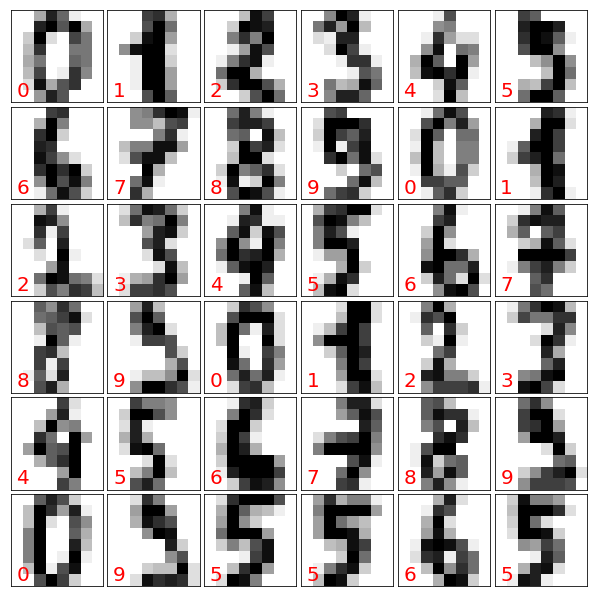

In [8]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]),color="red",fontsize=20)
plt.show()

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(digits.data)
X_scaled=scaler.transform(digits.data)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [12]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=100)
mlp.fit(X_scaled,digits.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [14]:
predicted = mlp.predict(X_scaled)

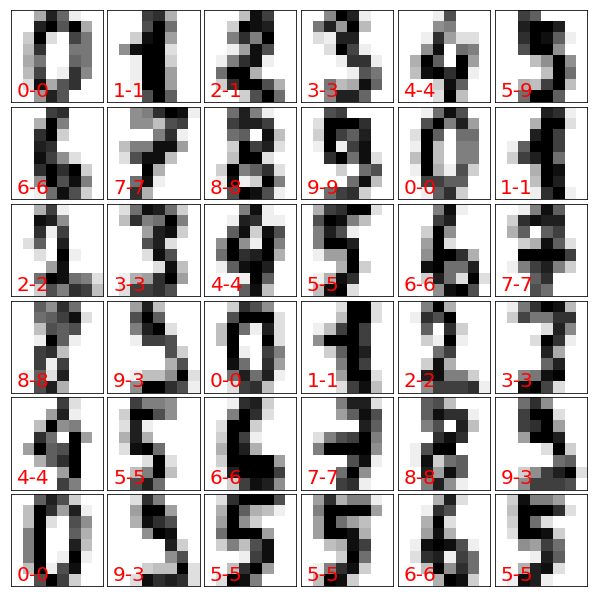

In [16]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)
for i in range(36):
    ax=fig.add_subplot(6,6,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7, '{}-{}'.format(str(digits.target[i]), predicted[i]) ,color="red",fontsize=20)
plt.show()

In [18]:
sum(digits.target == predicted) / len(digits.target)

0.9204229271007234

In [59]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(hidden_layer_sizes=(30,30,30),activation='logistic',max_iter=2000)
mlp.fit(X_scaled,digits.target)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [60]:
predicted = mlp.predict(X_scaled)

In [61]:
sum(digits.target == predicted) / len(digits.target)

0.9994435169727324

In [62]:
from PIL import Image
import numpy as np

img = Image.open('C:/Users/USER/Desktop/5.png')
img.load()
data = np.asarray( img, dtype="int32" )


In [63]:
data

array([[1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1],
       [1, 0, 0, 0, 0, 1, 1, 1]])

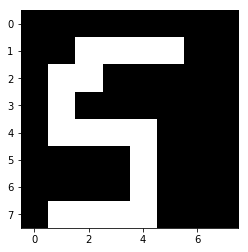

In [99]:
import matplotlib.pyplot as plt
plt.imshow(data,cmap=plt.cm.binary,interpolation='nearest')
plt.show()

In [101]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [103]:
1- data

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0]])

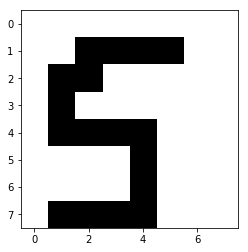

In [104]:
import matplotlib.pyplot as plt
plt.imshow((1- data),cmap=plt.cm.binary,interpolation='nearest')
plt.show()

In [105]:
(1- data) * 255

array([[  0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 255, 255, 255, 255,   0,   0],
       [  0, 255, 255,   0,   0,   0,   0,   0],
       [  0, 255,   0,   0,   0,   0,   0,   0],
       [  0, 255, 255, 255, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0],
       [  0,   0,   0,   0, 255,   0,   0,   0],
       [  0, 255, 255, 255, 255,   0,   0,   0]])

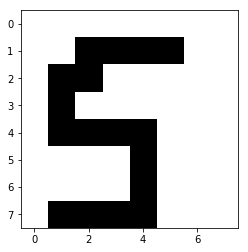

In [106]:
import matplotlib.pyplot as plt
plt.imshow(((1- data) * 255),cmap=plt.cm.binary,interpolation='nearest')
plt.show()

In [107]:
((1- data) * 255).ravel()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255,
       255,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,   0, 255,
         0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0])

In [108]:
item=scaler.transform([((1-data) * 255).ravel()])
item

array([[ 0.00000000e+00, -3.35016487e-01, -1.09493684e+00,
        -2.78643746e+00, -2.76424203e+00, -1.02065685e+00,
        -4.09723921e-01, -1.25022923e-01, -5.90775571e-02,
        -6.24009262e-01,  4.51328581e+01,  6.11151808e+01,
         5.11823363e+01,  4.07887803e+01, -5.14991458e-01,
        -1.30433381e-01, -4.46250733e-02,  7.05949192e+01,
         4.30811971e+01, -1.20543167e+00, -1.14964846e+00,
        -1.25998248e+00, -5.48805463e-01, -1.14221844e-01,
        -3.33797263e-02,  8.02790453e+01, -1.46862699e+00,
        -1.49990136e+00, -1.61406277e+00, -1.28625035e+00,
        -6.28895882e-01, -4.72323823e-02,  0.00000000e+00,
         7.26160457e+01,  3.91168148e+01,  3.92439882e+01,
         4.12516903e+01, -1.48986148e+00, -8.22694515e-01,
         0.00000000e+00, -6.13436689e-02, -5.31284098e-01,
        -1.05283456e+00, -1.12245711e+00,  3.95233105e+01,
        -1.44653841e+00, -7.98272248e-01, -8.87416172e-02,
        -3.54332626e-02, -4.03574986e-01, -1.33033057e+0

In [109]:
mlp.predict(item)

array([5])

In [116]:
from PIL import Image
import numpy as np

img = Image.open('C:/Users/USER/Desktop/6.png')
img.load()
data = np.asarray( img, dtype="int32" )


In [117]:
((1-data) * 255).ravel()

array([  0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0, 255, 255,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0,   0,   0, 255, 255, 255, 255,   0,
         0,   0,   0, 255,   0,   0, 255, 255,   0,   0,   0, 255, 255,
         0, 255, 255,   0,   0,   0,   0, 255, 255, 255,   0,   0])

In [118]:
item=scaler.transform([((1-data) * 255).ravel()])
item

array([[ 0.00000000e+00, -3.35016487e-01, -1.09493684e+00,
        -2.78643746e+00,  5.67290860e+01, -1.02065685e+00,
        -4.09723921e-01, -1.25022923e-01, -5.90775571e-02,
        -6.24009262e-01, -1.91557297e+00,  6.11151808e+01,
         5.11823363e+01, -1.35109507e+00, -5.14991458e-01,
        -1.30433381e-01, -4.46250733e-02, -7.27646281e-01,
         4.30811971e+01, -1.20543167e+00, -1.14964846e+00,
        -1.25998248e+00, -5.48805463e-01, -1.14221844e-01,
        -3.33797263e-02, -7.85105241e-01,  3.97247554e+01,
        -1.49990136e+00, -1.61406277e+00, -1.28625035e+00,
        -6.28895882e-01, -4.72323823e-02,  0.00000000e+00,
        -6.72372275e-01,  3.91168148e+01,  3.92439882e+01,
         4.12516903e+01,  4.19586638e+01, -8.22694515e-01,
         0.00000000e+00, -6.13436689e-02, -5.31284098e-01,
         3.79610458e+01, -1.12245711e+00, -1.22603292e+00,
         4.33379039e+01,  5.80966374e+01, -8.87416172e-02,
        -3.54332626e-02, -4.03574986e-01,  4.38589970e+0

In [119]:
mlp.predict(item)

array([6])

## TensorFlow
- 安裝 TensorFlow 與 Keras
- pip install tensorflow
- pip install keras

In [120]:
! pip install tensorflow

  Running setup.py bdist_wheel for gast: started
  Running setup.py bdist_wheel for gast: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\9a\1f\0e\3cde98113222b853e98fc0a8e9924480a3e25f1b4008cedb4f
  Running setup.py bdist_wheel for termcolor: started
  Running setup.py bdist_wheel for termcolor: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Running setup.py bdist_wheel for absl-py: started
  Running setup.py bdist_wheel for absl-py: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\23\35\1d\48c0a173ca38690dd8dfccfa47ffc750db48f8989ed898455c
  Running setup.py bdist_wheel for html5lib: started
  Running setup.py bdist_wheel for html5lib: finished with status 'done'
  Stored in directory: C:\Users\USER\AppData\Local\pip\Cache\wheels\50\ae\f9\d2b189788efcf61d1ee0e36045476735c838898eef1

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [121]:
! pip install keras

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


### 既有範例

In [ ]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation
from tensorflow.python.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')     # for division
x_test = x_test.astype('float32')
x_train /= 255                          # normalise
x_test /= 255

# One-hot encode the labels
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=200, batch_size=128)

### 用在sklearn 的 load_digits上

In [ ]:
import  keras
from  keras.models import Sequential
from  keras.layers import Dense

In [ ]:
model2 = Sequential()
model2.add(Dense(units = 30, kernel_initializer = 'uniform', activation = 'relu', input_shape=(64,)))
model2.add(Dense(units = 10, kernel_initializer = 'uniform', activation = 'softmax'))

num_classes = 10
y = to_categorical(digits.target, num_classes)

model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model2.fit(X_scaled, y, epochs=1000, batch_size=128)

In [146]:
model2.predict(item)

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

## 模型評估

In [153]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris=load_iris()
clf=LogisticRegression()
clf.fit(iris.data,iris.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [155]:
predicted = clf.predict(iris.data)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [158]:
sum(predicted == iris.target) / len(iris.target)

0.96

In [159]:
from sklearn.metrics import accuracy_score
accuracy_score(iris.target,predicted)

0.96

In [162]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(iris.target,predicted)
m

array([[50,  0,  0],
       [ 0, 45,  5],
       [ 0,  1, 49]], dtype=int64)

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


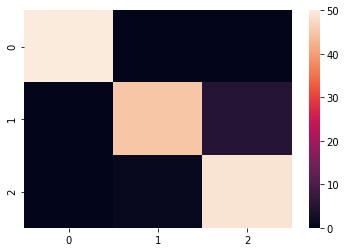

In [163]:
%pylab inline 
import seaborn
seaborn.heatmap(m)

In [164]:
from sklearn.metrics import classification_report
print(classification_report(iris.target,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      0.90      0.94        50
          2       0.91      0.98      0.94        50

avg / total       0.96      0.96      0.96       150



In [165]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
clf=DecisionTreeClassifier()
clf.fit(iris.data,iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [166]:
predicted = clf.predict(iris.data)

In [167]:
from sklearn.metrics import classification_report
print(classification_report(iris.target,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150



In [169]:
from sklearn import tree
tree.export_graphviz(clf,out_file='tree.dot')

## 交叉驗證

### Holdout 驗證

In [170]:
X=iris.data
y=iris.target

In [175]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.33, random_state = 123)

In [176]:
X.shape

(150, 4)

In [177]:
train_X.shape

(100, 4)

In [178]:
test_X.shape

(50, 4)

In [179]:
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [181]:
predicted = clf.predict(test_X)

In [182]:
accuracy_score(test_y, predicted)

0.96

In [183]:
predicted2 = clf.predict(train_X)

In [184]:
accuracy_score(train_y, predicted2)

1.0

In [185]:
clf=DecisionTreeClassifier(max_depth = 2)
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [186]:
predicted = clf.predict(test_X)
accuracy_score(test_y, predicted)

0.96

In [187]:
predicted = clf.predict(train_X)
accuracy_score(train_y, predicted)

0.96

In [188]:
from sklearn.metrics import accuracy_score
predicted=clf.predict(test_X)
accuracy_score(test_y,predicted)

0.96

In [189]:
from sklearn.metrics import confusion_matrix
m=confusion_matrix(test_y,predicted)
m

array([[20,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 17]], dtype=int64)

### K-Fold 驗證

In [191]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10)
for train,test in kf.split(X):
    train_X,test_X,train_y,test_y=X[train],X[test],y[train],y[test]
    clf=DecisionTreeClassifier(max_depth = 2)
    clf.fit(train_X,train_y)
    predicted=clf.predict(test_X)
    print(accuracy_score(test_y,predicted))

1.0
1.0
1.0
1.0
0.9333333333333333
0.8
1.0
0.8666666666666667
0.8
0.9333333333333333


In [192]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(clf,X=iris.data,y=iris.target,cv=10)

In [193]:
acc

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.86666667, 1.        , 1.        , 1.        ])

In [194]:
acc.mean()

0.9533333333333334

In [195]:
acc.std()

0.052068331172711015

In [196]:
from sklearn.model_selection import cross_val_score
for i in range(1,10):
    clf=DecisionTreeClassifier(max_depth = i)
    acc=cross_val_score(clf,X=iris.data,y=iris.target,cv=10)
    print(i, acc.mean())

1 0.6666666666666667
2 0.9533333333333334
3 0.96
4 0.96
5 0.9533333333333334
6 0.96
7 0.96
8 0.96
9 0.9533333333333334


### LeaveOneOut 驗證

In [197]:
from sklearn.model_selection import LeaveOneOut
res=[]
loo=LeaveOneOut()
for train,test in loo.split(X):
    train_X,test_X,train_y,test_y=X[train],X[test],y[train],y[test]
    clf=DecisionTreeClassifier(max_depth = 2)
    clf.fit(train_X,train_y)
    predicted=clf.predict(test_X)
    res.extend((predicted==test_y).tolist())
sum(res)

143

In [198]:
143 / 150

0.9533333333333334

## ROC Curve

In [199]:
X = iris.data
y = iris.target

In [200]:
clf=DecisionTreeClassifier(max_depth = 2)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [203]:
#clf.predict_proba(X)

In [205]:
X = iris.data[50:150,]
y = iris.target[50:150]

In [221]:
y = 2- y

In [222]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [206]:
clf=DecisionTreeClassifier(max_depth = 2)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [227]:
import pandas
FPR_ary = [0]
TPR_ary = [0]
for threshold in range(0,100):
    threshold = threshold * 0.01
    predicted = clf.predict_proba(X)[:,0]
    res = predicted > threshold 
    res = res.astype(int)
    m = confusion_matrix(y, res)
    TP = m[0,0]
    FP = m[0,1]
    FN = m[1,0]
    TN = m[1,1]
    FPR = FP / (FP+ TN)
    TPR = TP / (TP+ FN)
    if not pandas.isnull(FPR) and not pandas.isnull(TPR) :
        FPR_ary.append(FPR)
        TPR_ary.append(TPR)
FPR_ary.append(1)
TPR_ary.append(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [241]:
import numpy
np_fpr = numpy.array(FPR_ary)
np_tpr = numpy.array(TPR_ary)

In [244]:
pos = np_fpr.argsort()

In [ ]:
np_fpr[]

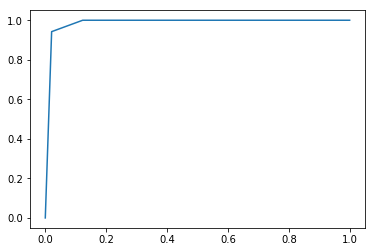

In [245]:
plt.plot(np_fpr[pos], np_tpr[pos])

In [246]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
iris=load_iris()
X=iris.data[50:150,]
le=preprocessing.LabelEncoder()
y=le.fit_transform(iris.target[50:150])
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [266]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.33,random_state=123)
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [267]:
probas_=clf.fit(train_X,train_y).predict_proba(test_X)
probas_[:,1]

array([0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.])

In [268]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])

In [269]:
fpr

array([0.        , 0.05882353, 1.        ])

In [270]:
tpr

array([0.    , 0.8125, 1.    ])

In [271]:
thresholds

array([2., 1., 0.])

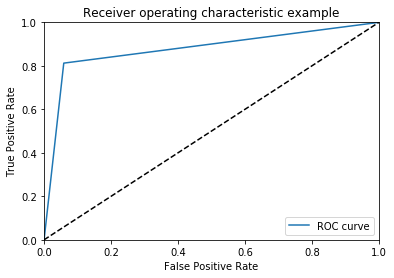

In [272]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label='ROC curve')
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [273]:
from sklearn.metrics import auc 
roc_auc=auc(fpr,tpr)
print("Area under the ROC curve : %f"%roc_auc)

Area under the ROC curve : 0.876838


In [279]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf1=DecisionTreeClassifier(max_depth = 2)
clf1.fit(train_X,train_y)

clf2=SVC(probability=True)
clf2.fit(train_X,train_y)

clf3=LogisticRegression()
clf3.fit(train_X,train_y)

clf4=RandomForestClassifier()
clf4.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

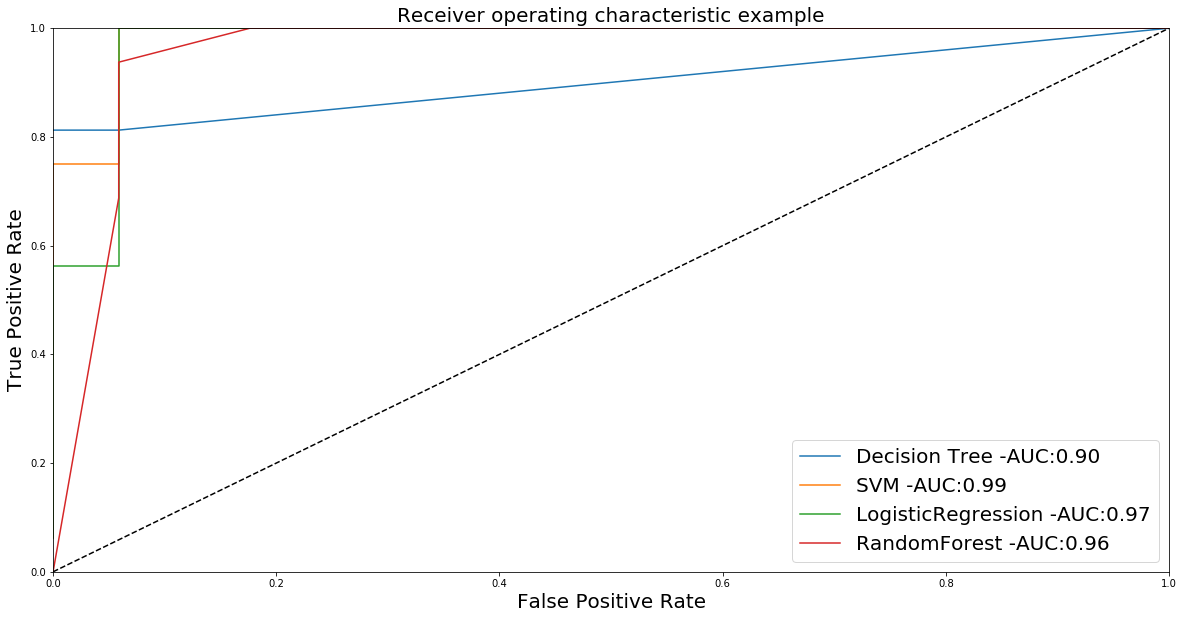

In [280]:
plt.figure(figsize=[20,10])
for clf,title in zip([clf1,clf2,clf3,clf4],['Decision Tree','SVM','LogisticRegression','RandomForest']):
    probas_=clf.fit(train_X,train_y).predict_proba(test_X)
    fpr,tpr,thresholds=roc_curve(test_y,probas_[:,1])
    plt.plot(fpr,tpr,label='%s -AUC:%.2f'%(title,auc(fpr,tpr)))
    
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate',fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic example',fontsize=20)
plt.legend(loc="lower right",fontsize=20)
plt.show()